# Iris Class Classification

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv('iris.csv')
df.head()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [9]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


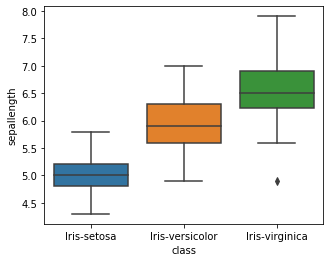

In [10]:
import seaborn as sn
plt.figure(figsize = (5,4))
sn.boxplot(x='class', y='sepallength', data = df)

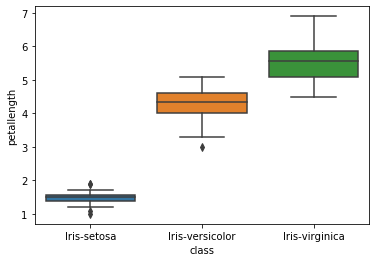

In [11]:
sn.boxplot(x='class', y='petallength', data = df)

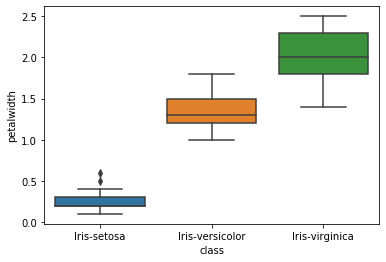

In [12]:
sn.boxplot(x='class', y='petalwidth', data = df)

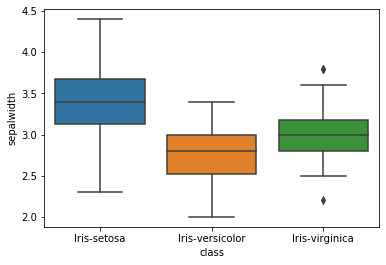

In [13]:
sn.boxplot(x='class', y='sepalwidth', data = df)

In [14]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.sample(5)

,sepallength,sepalwidth,petallength,petalwidth,class
36,5.5,3.5,1.3,0.2,0
60,5.0,2.0,3.5,1.0,1
24,4.8,3.4,1.9,0.2,0
94,5.6,2.7,4.2,1.3,1
53,5.5,2.3,4.0,1.3,1


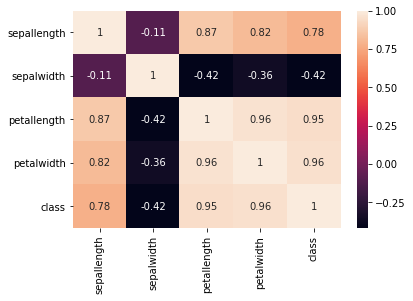

In [15]:
sn.heatmap(df.corr(), annot=True)

In [16]:
df.isna().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']], df['class'], test_size = 0.2)

# Logisic Regression

In [19]:
model = LogisticRegression(max_iter = 1000)

In [20]:
model.fit(X_train, Y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
model.score(X_test, Y_test)

0.9666666666666667

In [22]:
model.predict(X_test)

array([1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2,
       0, 2, 0, 0, 1, 0, 2, 2])

In [23]:
y_predicted = model.predict(X_test)

In [25]:
from sklearn.model_selection import cross_val_score
X = df.drop(['class'], axis = 'columns')
Y = df['class']
cross_val_score(LogisticRegression(max_iter = 1000), X, Y, cv = 5).mean()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

0.9600000000000002

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted, Y_test)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

Text(15.0, 0.5, 'Truth')

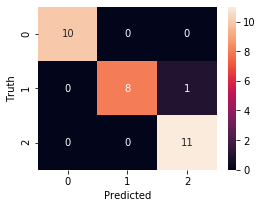

In [27]:
import seaborn as sn
plt.figure(figsize = (4, 3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
X = df.drop(['class'], axis = 'columns')
Y = df['class']
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(n_neighbors=4), X, Y, cv = 5).mean()

0.9733333333333334

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

